In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint

In [33]:
t = np.linspace(0,8,1000)

masa = 0.1; 
radio = 0.1; 
distancia = 0.3; 
g = 9.81; 
psi_dot_0 = 400; 
theta_0 = np.pi/4

In [34]:
I0 = (1/4)*masa*radio**2 + masa*distancia**2
Iz = (1/2)*masa*radio**2

p_phi = Iz*psi_dot_0*np.cos(theta_0)


phi_dot = lambda theta: (p_phi - Iz*psi_dot_0*np.cos(theta))/(I0*np.sin(theta)**2+Iz*np.cos(theta)**2)

In [35]:
def EulerLagrange(y,t):
    
    phi,psi,theta,theta_dot = y
    
    dt_psi = psi_dot_0
    dt_phi = phi_dot(theta)
    dt_theta = theta_dot
    ddt_theta = (dt_phi**2 *np.sin(theta)*np.cos(theta)*(I0 - Iz) - dt_phi*dt_psi*Iz*np.sin(theta)+masa*g*distancia*np.sin(theta))/I0
    
    return [dt_phi, dt_phi, dt_theta, ddt_theta]


In [36]:
y_0 = (0.,0.,np.pi/4,0)
y = odeint(EulerLagrange,y_0,t)

In [37]:
phi_1 = y[:,0]
psi_1 = y[:,1]
theta_1 = y[:,2]

x = distancia*np.sin(theta_1)*np.sin(phi_1)
y = distancia*np.sin(theta_1)*np.cos(phi_1)
z = distancia*np.cos(theta_1)

<IPython.core.display.Javascript object>


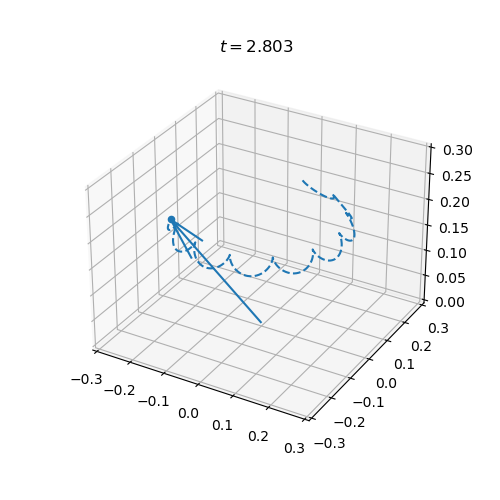

In [38]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection="3d")

def init_():
    
    ax.clear()
    ax.set_zlim(0,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_xlim(-0.3,0.3)
       
def Update_(i):   
    
    init_()
    ax.quiver(0,0,0,x[10*i],y[10*i],z[10*i])
    ax.plot(x[:10*i],y[:10*i],z[:10*i],"--")
    ax.scatter(x[10*i],y[10*i],z[10*i])
    ax.set_title(r"$t = %s$"%(round(t[10*i],3)))
        
Animation = animation.FuncAnimation(fig,Update_,frames=len(t[::10]),init_func=init_)

<IPython.core.display.Javascript object>


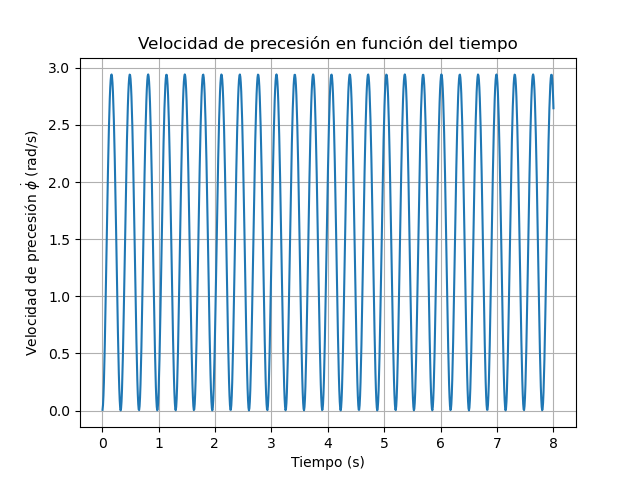

In [41]:
delta_phi = np.diff(phi_1)
delta_t = np.diff(t)  

phi_dot_numerica = delta_phi / delta_t

plt.plot(t[1:], phi_dot_numerica)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad de precesión $\dot{\phi}$ (rad/s)')
plt.title('Velocidad de precesión en función del tiempo')
plt.grid(True)
plt.show()

In [40]:
phi_dot_numerica[-1]

2.6456828889292017